In [2]:
import logging
import os
import subprocess
import time
import csv
import zipfile
import string
import random

In [4]:
import swiftclient
import swiftclient.service
from swiftclient.utils import generate_temp_url

from swiftclient.service import SwiftService

In [5]:
def zip_files( files, zip_name ):
    zip = zipfile.ZipFile( zip_name, 'w', zipfile.ZIP_DEFLATED )
    for file in files:
        zip.write(file)
    zip.close()

In [6]:
user = 'test:tester' 
key = 'testing'
endpoint = 'http://localhost:12345'
conn = swiftclient.Connection(
    user=user,
    key=key,
    authurl=endpoint+'/auth/v1.0',
)

In [7]:
class ConnUtil:
    bucket_name = "test_bundle"
    con = None

    @staticmethod
    def init_param(user, key, endpoint):
        ConnUtil.con = conn = swiftclient.Connection(
            user=user,
            key=key,
            authurl=endpoint,
        )
        if ConnUtil.bucket_name not in [i['name'] for i in ConnUtil.con.get_account()[1]]:
            ConnUtil.con.put_container(ConnUtil.bucket_name)

    @staticmethod
    def init(c):
        ConnUtil.con = c

    @staticmethod
    def getList():
        return ConnUtil.con.get_container(ConnUtil.bucket_name)[1] if ConnUtil.con is not None else None

    @staticmethod
    def uploadFile(f, filename=None):
        return ConnUtil.con.put_object(ConnUtil.bucket_name, filename,
                                       contents=f.read()) if ConnUtil.con is not None else None
    
    @staticmethod
    def downloadFile(filename):
        if ConnUtil.con is None:
            return False
        with open(filename, "wb") as f:
            f.write(ConnUtil.con.get_object(ConnUtil.bucket_name, "send_email.py")[1])
        return True

    @staticmethod
    def deleteFile(filename):
        if ConnUtil.con is None or filename is None:
            return False
        ConnUtil.con.delete_object(ConnUtil.bucket_name, filename)
        return True

In [12]:
ConnUtil.init(conn)

In [13]:
ConnUtil.con.put_container(ConnUtil.bucket_name)

In [8]:
ConnUtil.getList()

[{'hash': '46f40f95feefb6ab49b2b3679b5ec0a2',
  'last_modified': '2019-05-15T09:28:35.136670',
  'bytes': 10485760,
  'name': '10m',
  'content_type': 'application/octet-stream'},
 {'hash': 'b561f87202d04959e37588ee05cf5b10',
  'last_modified': '2019-05-15T09:28:41.199070',
  'bytes': 1048576,
  'name': '1m',
  'content_type': 'application/octet-stream'},
 {'hash': '67b2f816a30e8956149b2d7beb479e51',
  'last_modified': '2019-05-15T09:28:41.196330',
  'bytes': 2097152,
  'name': '2m',
  'content_type': 'application/octet-stream'},
 {'hash': 'c1887f0c970afa48194adf7f5c504696',
  'last_modified': '2019-05-15T09:28:42.308120',
  'bytes': 3145728,
  'name': '3m',
  'content_type': 'application/octet-stream'},
 {'hash': '44981362d3ba9b5bacaf017c2f29d355',
  'last_modified': '2019-05-15T09:28:43.481820',
  'bytes': 4194304,
  'name': '4m',
  'content_type': 'application/octet-stream'},
 {'hash': '4f08eef4096726bff1125e1b1b734644',
  'last_modified': '2019-05-15T09:28:46.540350',
  'bytes': 52

In [10]:
# create file in specified size
for i in range(1,101):
    file_name = "data/"+str(i)+"m"
    content = ['x' for _ in range(1024*1024)]
    with open(file_name,"w") as f:
        for j in range(i):
            f.writelines(content)

In [45]:
speed_list = []
for _ in range(3):
    for i in range(1,50):
        file_name = "data/"+str(i)+"m"
        with open(file_name,"rb") as f:
            start_time = time.time()
            ConnUtil.con.put_object(ConnUtil.bucket_name, file_name, contents=f.read())
        end_time = time.time()
        speed_list.append(i/(end_time-start_time))
        print(file_name+",\ttime:"+str(end_time-start_time)+",\tspeed:"+str(i/(end_time-start_time))+" MB/S")

data/1m,	time:0.03728818893432617,	speed:26.81814345451988 MB/S
data/2m,	time:0.05968904495239258,	speed:33.50698610767154 MB/S
data/3m,	time:0.13166046142578125,	speed:22.78588398910587 MB/S
data/4m,	time:0.08338594436645508,	speed:47.96971516471954 MB/S
data/5m,	time:0.10709595680236816,	speed:46.68710331639184 MB/S
data/6m,	time:0.1302952766418457,	speed:46.04925178134229 MB/S
data/7m,	time:0.13917231559753418,	speed:50.297359571446435 MB/S
data/8m,	time:0.14940142631530762,	speed:53.54701221604283 MB/S
data/9m,	time:0.15180301666259766,	speed:59.28735935468064 MB/S
data/10m,	time:0.1783452033996582,	speed:56.07103420432761 MB/S
data/11m,	time:0.15566349029541016,	speed:70.66525348445397 MB/S
data/12m,	time:0.22295188903808594,	speed:53.82327125270551 MB/S
data/13m,	time:0.22260594367980957,	speed:58.399159452358795 MB/S
data/14m,	time:0.23602604866027832,	speed:59.31548691115342 MB/S
data/15m,	time:0.21675658226013184,	speed:69.2020507224936 MB/S
data/16m,	time:0.3186638355255127,	

data/31m,	time:0.6162216663360596,	speed:50.30657260774404 MB/S
data/32m,	time:0.6655657291412354,	speed:48.0793986212134 MB/S
data/33m,	time:0.6410067081451416,	speed:51.48152052182251 MB/S
data/34m,	time:0.8627679347991943,	speed:39.408047782760214 MB/S
data/35m,	time:0.8846313953399658,	speed:39.5645013102315 MB/S
data/36m,	time:0.7981102466583252,	speed:45.10655031774297 MB/S
data/37m,	time:0.8345332145690918,	speed:44.33616224502798 MB/S
data/38m,	time:0.8323569297790527,	speed:45.653491477612874 MB/S
data/39m,	time:0.8973853588104248,	speed:43.45959026086457 MB/S
data/40m,	time:0.9693758487701416,	speed:41.26366470832595 MB/S
data/41m,	time:0.7966644763946533,	speed:51.46457663776806 MB/S
data/42m,	time:0.9166557788848877,	speed:45.8187260337714 MB/S
data/43m,	time:0.9372148513793945,	speed:45.8806216490408 MB/S
data/44m,	time:1.038848638534546,	speed:42.354582147856206 MB/S
data/45m,	time:0.9739139080047607,	speed:46.20531612716227 MB/S
data/46m,	time:0.9896905422210693,	speed:4

In [50]:
d_speed_list = []
for _ in range(3):
    for i in range(1,50):
        file_name = "data/"+str(i)+"m"
        start_time = time.time()
        ConnUtil.con.get_object(ConnUtil.bucket_name, file_name)
        end_time = time.time()
        d_speed_list.append(i/(end_time-start_time))
        print(file_name+",\ttime:"+str(end_time-start_time)+",\tspeed:"+str(i/(end_time-start_time))+" MB/S")

data/1m,	time:0.04864144325256348,	speed:20.55860050878113 MB/S
data/2m,	time:0.03675961494445801,	speed:54.40753400224411 MB/S
data/3m,	time:0.04177355766296387,	speed:71.81576499192403 MB/S
data/4m,	time:0.0717465877532959,	speed:55.751780332107124 MB/S
data/5m,	time:0.10303235054016113,	speed:48.52844736421928 MB/S
data/6m,	time:0.07490754127502441,	speed:80.09874437035505 MB/S
data/7m,	time:0.08419394493103027,	speed:83.14137086383394 MB/S
data/8m,	time:0.09796953201293945,	speed:81.65804036854426 MB/S
data/9m,	time:0.11133837699890137,	speed:80.83466135031597 MB/S
data/10m,	time:0.11951231956481934,	speed:83.67338226228927 MB/S
data/11m,	time:0.13034391403198242,	speed:84.39212587479102 MB/S
data/12m,	time:0.14300775527954102,	speed:83.91153316506006 MB/S
data/13m,	time:0.18148279190063477,	speed:71.63213582871121 MB/S
data/14m,	time:0.17183923721313477,	speed:81.47149758722213 MB/S
data/15m,	time:0.17693281173706055,	speed:84.7779439705704 MB/S
data/16m,	time:0.19408082962036133,

data/31m,	time:0.36333680152893066,	speed:85.32028649327896 MB/S
data/32m,	time:0.40805697441101074,	speed:78.42042167319597 MB/S
data/33m,	time:0.412764310836792,	speed:79.94877254067704 MB/S
data/34m,	time:0.47646617889404297,	speed:71.35868505697432 MB/S
data/35m,	time:0.5148441791534424,	speed:67.98173392491385 MB/S
data/36m,	time:0.5193729400634766,	speed:69.31435433582689 MB/S
data/37m,	time:0.509188175201416,	speed:72.66468822722399 MB/S
data/38m,	time:0.5118751525878906,	speed:74.23685210716548 MB/S
data/39m,	time:0.4692678451538086,	speed:83.10818736625188 MB/S
data/40m,	time:0.47021937370300293,	speed:85.06667788908365 MB/S
data/41m,	time:0.5208890438079834,	speed:78.71158068572072 MB/S
data/42m,	time:0.5660324096679688,	speed:74.20069819789462 MB/S
data/43m,	time:0.5465035438537598,	speed:78.68201493585644 MB/S
data/44m,	time:0.6554255485534668,	speed:67.13195739334331 MB/S
data/45m,	time:0.5789282321929932,	speed:77.7298419694251 MB/S
data/46m,	time:0.5470702648162842,	spee

In [17]:
import csv
with open("data.csv","w", newline='') as f:
    writer = csv.writer(f)
    writer.writerows([[j] for j in speed_list])

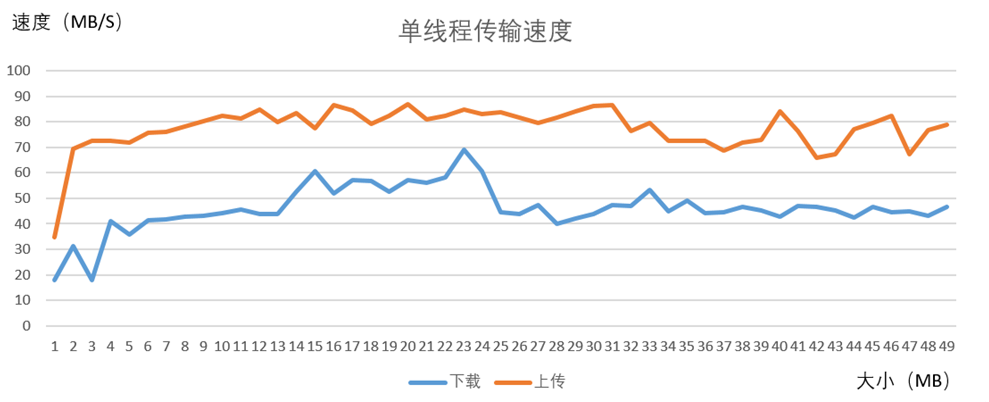

In [42]:
SLOcontainerName='big_SLO' 
file_name = 'data/100m'

swift_options = {
    "user" : "test:tester",
    "key" : 'testing',
    "auth" : 'http://localhost:12345/auth/v1.0',
    "segment_size" : '5242880', # 5M one segement   
    'object_uu_threads' : 20, #20线程并发上传 
    "use_slo" : True
}

with SwiftService(swift_options) as sws:
    start_time = time.time()
    for r in sws.upload(container=SLOcontainerName, objects=[file_name]):
        continue
    end_time = time.time()
    
print(file_name+",\ttime:"+str(end_time-start_time)+",\tspeed:"+str(100/(end_time-start_time))+" MB/S")

with open(file_name) as f:
    start_time = time.time()
    ConnUtil.uploadFile(f,file_name)
    end_time = time.time()
    print(file_name+",\ttime:"+str(end_time-start_time)+",\tspeed:"+str(100/(end_time-start_time))+" MB/S")

data/100m,	time:1.9825339317321777,	speed:50.440498595970105 MB/S
data/100m,	time:1.3944518566131592,	speed:71.71276622118724 MB/S


In [32]:
with open(file_name) as f:
    start_time = time.time()
    ConnUtil.uploadFile(f,file_name)
    end_time = time.time()
    print(file_name+",\ttime:"+str(end_time-start_time)+",\tspeed:"+str(100/(end_time-start_time))+" MB/S")

data/100m,	time:1.4714322090148926,	speed:67.96099703903374 MB/S


In [40]:
# make 200 small file
for i in range(200):
    with open("1m_dir/"+str(i),'w') as f:
        for _ in range(256*1024):
            f.write(random.choice('abcdefghijklmnopqrstuvwxyz!@#$%^&*()'))

In [20]:
files = []
for i in range(0,50):
    files.append("1m_dir/"+str(i))
    zip_files(files, "1m_dir/"+str(i)+".zip")

['1m_dir/1']
compressing 1m_dir/1
compressing finished
['1m_dir/1', '1m_dir/2']
compressing 1m_dir/1
compressing 1m_dir/2
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compre

compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7', '1m_dir/8', '1m_dir/9', '1m_dir/10', '1m_dir/11', '1m_dir/12', '1m_dir/13', '1m_dir/14', '1m_dir/15', '1m_dir/16', '1m_dir/17', '1m_dir/18', '1m_dir/19', '1m_dir/20', '1m_dir/21', '1m_dir/22', '1m_dir/23']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7', '1m_dir/8', '1m_dir

compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7', '1m_dir/8', '1m_dir/9', '1m_dir/10', '1m_dir/11', '1m_dir/12', '1m_dir/13', '1m_dir/14', '1m_dir/15', '1m_dir/16', '1m_dir/17', '1m_dir/18', '1m_dir/19', '1m_dir/20', '1m_dir/21', '1m_dir/22', '1m_dir/23', '1m_dir/24', '1m_dir/25', '1m_dir/26', '1m_dir/27', '1m_dir/28', '1m_dir/29', '1m_dir/30', '1m_dir/31', '1m_dir/32']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compress

compressing 1m_dir/38
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7', '1m_dir/8', '1m_dir/9', '1m_dir/10', '1m_dir/11', '1m_dir/12', '1m_dir/13', '1m_dir/14', '1m_dir/15', '1m_dir/16', '1m_dir/17', '1m_dir/18', '1m_dir/19', '1m_dir/20', '1m_dir/21', '1m_dir/22', '1m_dir/23', '1m_dir/24', '1m_dir/25', '1m_dir/26', '1m_dir/27', '1m_dir/28', '1m_dir/29', '1m_dir/30', '1m_dir/31', '1m_dir/32', '1m_dir/33', '1m_dir/34', '1m_dir/35', '1m_dir/36', '1m_dir/37', '1m_dir/38', '1m_dir/39']
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compr

compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing finished
['1m_dir/1', '1m_dir/2', '1m_dir/3', '1m_dir/4', '1m_dir/5', '1m_dir/6', '1m_dir/7', '1m_dir/8', '1m_dir/9', '1m_dir/10', '1m_dir/11', '1m_dir/12', '1m_dir/13', '1m_dir/14', '1m_dir/15', '1m_dir/16', '1m_dir/17', '1m_dir/18', '1m_dir/19', '1m_dir/20', '1m_dir/21', '1m_dir/22', '1m_dir/23', '1m_dir/24', '1m_dir/25', '1m_dir/26', '1m_dir/27', '1m_dir/28', '1m_dir/29', '1m_dir/30', '1m_dir/31', '1m_dir/32', '1m_dir/33', '1m_dir/34', '1m_dir/35', '1m_

compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing finished


In [41]:
# 测试多个小文件和打包多个小文件的测试情况
result_list=[]

files = []

for i in range(200):
    start_time_1 = time.time()
    
    for j in range(i+1):
        with open("1m_dir/"+str(j)) as f:
            ConnUtil.uploadFile(f,str(j))
            
    end_time_1 = time.time()
    
    files.append("1m_dir/"+str(i))
    zip_files(files, "1m_dir/"+str(i)+".zip")
    with open("1m_dir/"+str(i)+".zip","rb") as f:
        ConnUtil.uploadFile(f,"1m_dir/"+str(i)+".zip")
    
    end_time_2 = time.time()
    
    result_list.append([end_time_1-start_time_1,end_time_2-end_time_1])

compressing 1m_dir/0
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1

compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing finished
compressing 1m_dir/0
c

compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34

compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23

compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44

compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/

compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16

compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressin

compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressin

compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m

compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressin

compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110

compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
comp

compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing

compressing 1m_dir/122
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/4

compressing 1m_dir/124
compressing 1m_dir/125
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/

compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_

compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21

compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132

compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressin

compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/4

compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
c

compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressin

compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compre

compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressin

compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing

compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressin

compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressin

compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing 1m_dir/151
compressing 1m_dir/152
compressing 1m_dir/153
compressing 1m_dir/154
compressing 1m_dir/155
compressing 1m_dir/156
compressing 1m_dir/157
compressing 1m_dir/158
compressing 1m_dir/159
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_di

compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressin

compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/11

compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing

compressing 1m_dir/150
compressing 1m_dir/151
compressing 1m_dir/152
compressing 1m_dir/153
compressing 1m_dir/154
compressing 1m_dir/155
compressing 1m_dir/156
compressing 1m_dir/157
compressing 1m_dir/158
compressing 1m_dir/159
compressing 1m_dir/160
compressing 1m_dir/161
compressing 1m_dir/162
compressing 1m_dir/163
compressing 1m_dir/164
compressing 1m_dir/165
compressing 1m_dir/166
compressing 1m_dir/167
compressing 1m_dir/168
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
co

compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressin

compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressin

compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/11

compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressi

compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir

compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing 1m_dir/151
compressing 1m_dir/152
compressing

compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing 1m_dir/151
compressing 1m_dir/152
compressing

compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing

compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing 1m_dir/143
compressing 1m_dir/144
compressing 1m_dir/145
compressing 1m_dir/146
compressing 1m_dir/147
compressing 1m_dir/148
compressing 1m_dir/149
compressing 1m_dir/150
compressing 1m_dir/151
compressing

compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_dir/138
compressing 1m_dir/139
compressing 1m_dir/140
compressing 1m_dir/141
compressing 1m_dir/142
compressing

compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compressing 1m_dir/124
compressing 1m_dir/125
compressing 1m_dir/126
compressing 1m_dir/127
compressing 1m_dir/128
compressing 1m_dir/129
compressing 1m_dir/130
compressing 1m_dir/131
compressing 1m_dir/132
compressing 1m_dir/133
compressing 1m_dir/134
compressing 1m_dir/135
compressing 1m_dir/136
compressing 1m_dir/137
compressing 1m_d

compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressing 1m_dir/99
compressing 1m_dir/100
compressing 1m_dir/101
compressing 1m_dir/102
compressing 1m_dir/103
compressing 1m_dir/104
compressing 1m_dir/105
compressing 1m_dir/106
compressing 1m_dir/107
compressing 1m_dir/108
compressing 1m_dir/109
compressing 1m_dir/110
compressing 1m_dir/111
compressing 1m_dir/112
compressing 1m_dir/113
compressing 1m_dir/114
compressing 1m_dir/115
compressing 1m_dir/116
compressing 1m_dir/117
compressing 1m_dir/118
compressing 1m_dir/119
compressing 1m_dir/120
compressing 1m_dir/121
compressing 1m_dir/122
compressing 1m_dir/123
compress

compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressing 1m_dir/70
compressing 1m_dir/71
compressing 1m_dir/72
compressing 1m_dir/73
compressing 1m_dir/74
compressing 1m_dir/75
compressing 1m_dir/76
compressing 1m_dir/77
compressing 1m_dir/78
compressing 1m_dir/79
compressing 1m_dir/80
compressing 1m_dir/81
compressing 1m_dir/82
compressing 1m_dir/83
compressing 1m_dir/84
compressing 1m_dir/85
compressing 1m_dir/86
compressing 1m_dir/87
compressing 1m_dir/88
compressing 1m_dir/89
compressing 1m_dir/90
compressing 1m_dir/91
compressing 1m_dir/92
compressing 1m_dir/93
compressing 1m_dir/94
compressing 1m_dir/95
compressing 1m_dir/96
compressing 1m_dir/97
compressing 1m_dir/98
compressin

compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1m_dir/36
compressing 1m_dir/37
compressing 1m_dir/38
compressing 1m_dir/39
compressing 1m_dir/40
compressing 1m_dir/41
compressing 1m_dir/42
compressing 1m_dir/43
compressing 1m_dir/44
compressing 1m_dir/45
compressing 1m_dir/46
compressing 1m_dir/47
compressing 1m_dir/48
compressing 1m_dir/49
compressing 1m_dir/50
compressing 1m_dir/51
compressing 1m_dir/52
compressing 1m_dir/53
compressing 1m_dir/54
compressing 1m_dir/55
compressing 1m_dir/56
compressing 1m_dir/57
compressing 1m_dir/58
compressing 1m_dir/59
compressing 1m_dir/60
compressing 1m_dir/61
compressing 1m_dir/62
compressing 1m_dir/63
compressing 1m_dir/64
compressing 1m_dir/65
compressing 1m_dir/66
compressing 1m_dir/67
compressing 1m_dir/68
compressing 1m_dir/69
compressin

compressing 1m_dir/191
compressing 1m_dir/192
compressing 1m_dir/193
compressing 1m_dir/194
compressing 1m_dir/195
compressing 1m_dir/196
compressing 1m_dir/197
compressing 1m_dir/198
compressing finished
compressing 1m_dir/0
compressing 1m_dir/1
compressing 1m_dir/2
compressing 1m_dir/3
compressing 1m_dir/4
compressing 1m_dir/5
compressing 1m_dir/6
compressing 1m_dir/7
compressing 1m_dir/8
compressing 1m_dir/9
compressing 1m_dir/10
compressing 1m_dir/11
compressing 1m_dir/12
compressing 1m_dir/13
compressing 1m_dir/14
compressing 1m_dir/15
compressing 1m_dir/16
compressing 1m_dir/17
compressing 1m_dir/18
compressing 1m_dir/19
compressing 1m_dir/20
compressing 1m_dir/21
compressing 1m_dir/22
compressing 1m_dir/23
compressing 1m_dir/24
compressing 1m_dir/25
compressing 1m_dir/26
compressing 1m_dir/27
compressing 1m_dir/28
compressing 1m_dir/29
compressing 1m_dir/30
compressing 1m_dir/31
compressing 1m_dir/32
compressing 1m_dir/33
compressing 1m_dir/34
compressing 1m_dir/35
compressing 1

In [42]:
result_list

[[0.06286406517028809, 0.040216922760009766],
 [0.046167850494384766, 0.05602407455444336],
 [0.071380615234375, 0.07799696922302246],
 [0.08899068832397461, 0.09603619575500488],
 [0.11320257186889648, 0.11063218116760254],
 [0.12838983535766602, 0.16102910041809082],
 [0.19943618774414062, 0.14452290534973145],
 [0.19291377067565918, 0.16177845001220703],
 [0.1975862979888916, 0.1822185516357422],
 [0.2657957077026367, 0.22667908668518066],
 [0.25815558433532715, 0.20964527130126953],
 [0.2753269672393799, 0.2233734130859375],
 [0.29970669746398926, 0.24779033660888672],
 [0.3333919048309326, 0.27118444442749023],
 [0.341566801071167, 0.2931978702545166],
 [0.39568567276000977, 0.37102222442626953],
 [0.46900224685668945, 0.3459489345550537],
 [0.4867277145385742, 0.3948476314544678],
 [0.463259220123291, 0.37357425689697266],
 [0.5981853008270264, 0.5343637466430664],
 [1.0103538036346436, 0.4192488193511963],
 [0.5545992851257324, 0.5195693969726562],
 [0.6403605937957764, 0.508745

In [43]:
with open("256k_bundle_200.csv","w", newline='') as f:
    writer = csv.writerows(f)
    writer.writerows(result_list)

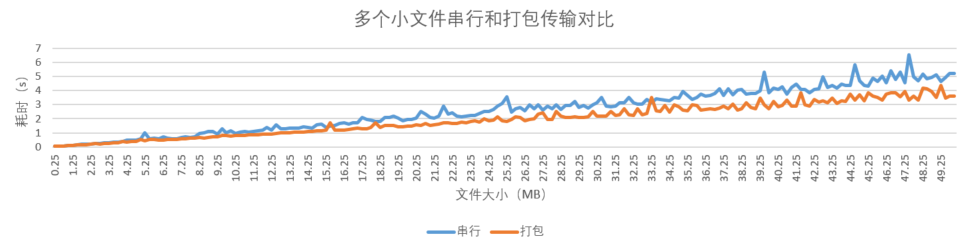

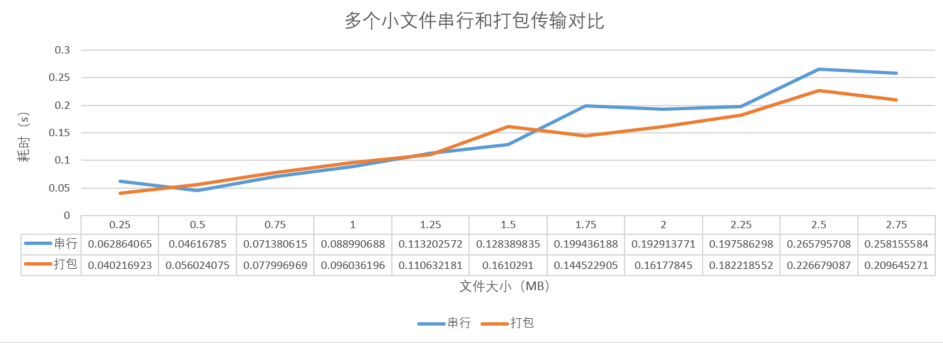